> ### Exploring the Relationship Between Income Inequality and Mental Health in Urban Areas

**Objective**: Investigate the correlation between income inequality and mental health in major cities and identify the key factors that contribute to mental health issues.

**Target Variable**: 'Mental Health' (from metric_subcat_label)
**Relevant Independent Variables** (from metric_item_label):
- 'Household Income Inequality'
- 'Poverty in All Ages'
- 'Unemployment'
- 'Population Density'
- 'Educational Attainment'
- 'Public Transportation Use'


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [11]:
# dataset: https://bigcitieshealthdata.org/

# Load the data
data = pd.read_csv('BigCitiesHealth.csv')
data.head()

C:\Users\pih\AppData\Local\Temp\ipykernel_17160\1661524112.py:4: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('BigCitiesHealth.csv')


,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,metric_source_desc_label_fn,metric_source_desc_label_url_fn,geo_label_city,geo_label_state,geo_label_citystate,...,value_90_ci_low,value_90_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label,strata_race_sex_label
0,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,San Antonio,TX,"San Antonio, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Male,White Male
1,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Houston,TX,"Houston, TX",...,NaN,NaN,South,Poorest cities (20%+ poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),White,Male,White Male
2,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Fort Worth,TX,"Fort Worth, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Male,White Male
3,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,El Paso,TX,"El Paso, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),White,Male,White Male
4,COVID-19 Deaths,Infectious Diseases,Respiratory Infection,"Deaths from COVID-19 (per 100,000 population, ...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Dallas,TX,"Dallas, TX",...,NaN,NaN,South,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),White,Male,White Male


In [22]:
# Preprocess the data
# Filter the data by the target and relevant independent variables
target_var = 'Mental Health'
independent_vars = [
    'Household Income Inequality',
    'Poverty in All Ages',
    'Unemployment',
    'Population Density',
    'Educational Attainment',
    'Public Transportation Use'
]

mental_health_data = data[data['metric_subcat_label']==target_var]

In [23]:
filtered_data = data[data['metric_subcat_label'].isin([target_var] + independent_vars)]

In [24]:
filtered_data = filtered_data.drop(columns=['value_90_ci_low','value_90_ci_high'])
filtered_data.head()

,metric_item_label,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,metric_source_desc_label_fn,metric_source_desc_label_url_fn,geo_label_city,geo_label_state,geo_label_citystate,...,value_95_ci_low,value_95_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label,strata_race_sex_label
86823,Adult Mental Distress,Mental Health and Substance Use,Mental Health,Percent of adults aged 18+ with mental health ...,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,Los Angeles,CA,"Los Angeles, CA",...,13.2,13.3,West,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),All,Both,NaN
86824,Adult Mental Distress,Mental Health and Substance Use,Mental Health,Percent of adults aged 18+ with mental health ...,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,Tucson,AZ,"Tucson, AZ",...,13.2,13.5,West,Poorest cities (20%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both,NaN
86825,Adult Mental Distress,Mental Health and Substance Use,Mental Health,Percent of adults aged 18+ with mental health ...,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,Long Beach,CA,"Long Beach, CA",...,12.9,13.2,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),All,Both,NaN
86826,Adult Mental Distress,Mental Health and Substance Use,Mental Health,Percent of adults aged 18+ with mental health ...,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,San Diego,CA,"San Diego, CA",...,11.1,11.3,West,Less poor cities (<20% poor),Largest (>1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both,NaN
86827,Adult Mental Distress,Mental Health and Substance Use,Mental Health,Percent of adults aged 18+ with mental health ...,Percent,Centers for Disease Control and Prevention's P...,https://www.cdc.gov/places/index.html,Denver,CO,"Denver, CO",...,10.2,10.4,West,Less poor cities (<20% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both,NaN


In [25]:
# Perform data cleaning if necessary
# For example, handling missing values, incorrect data types, etc.

# Descriptive statistics
filtered_data.describe()

,geo_fips_code,value,date_label,value_95_ci_low,value_95_ci_high
count,7.265000e+03,7322.000000,7322.000000,6768.000000,6768.000000
mean,2.830552e+06,13.964732,2015.468315,10.944452,17.420246
std,1.702615e+06,8.367172,3.285095,7.415402,10.348425
min,4.550000e+05,1.197470,2010.000000,0.621920,1.673626
25%,6.680000e+05,8.249384,2013.000000,5.538759,10.624349
50%,2.938000e+06,12.300000,2015.000000,9.401061,15.029983
75%,4.260000e+06,17.244797,2018.000000,14.075144,21.769000
max,5.553000e+06,59.397831,2021.000000,48.192578,161.064265


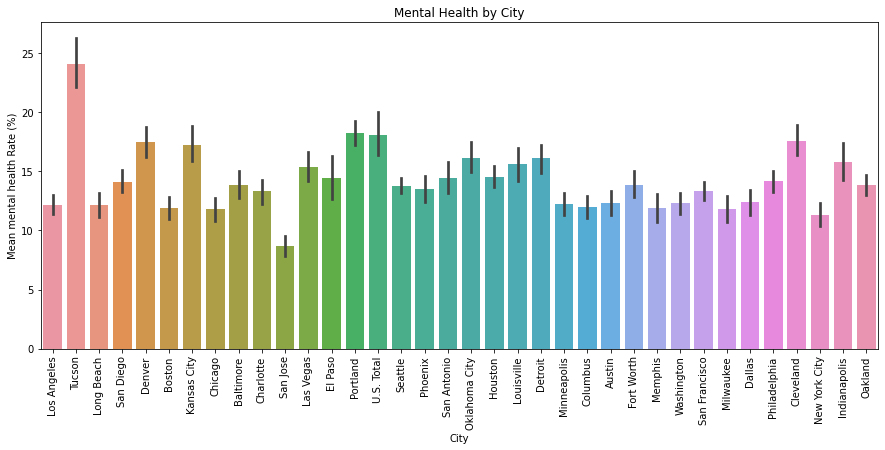

In [26]:
# Visualizations
# Group the data by city and compute the mean yearlt value for 'Mental Health'
city_mental_health = mental_health_data.groupby('geo_label_city')['value'].mean().reset_index()

# Barplot of 'Adult Obesity' mean value for each city
plt.figure(figsize=(15, 6))
sns.barplot(x='geo_label_city', y='value', data=mental_health_data)
plt.title('Mental Health by City')
plt.xlabel('City')
plt.xticks(rotation=90)
plt.ylabel('Mean mental health Rate (%)')
plt.show()

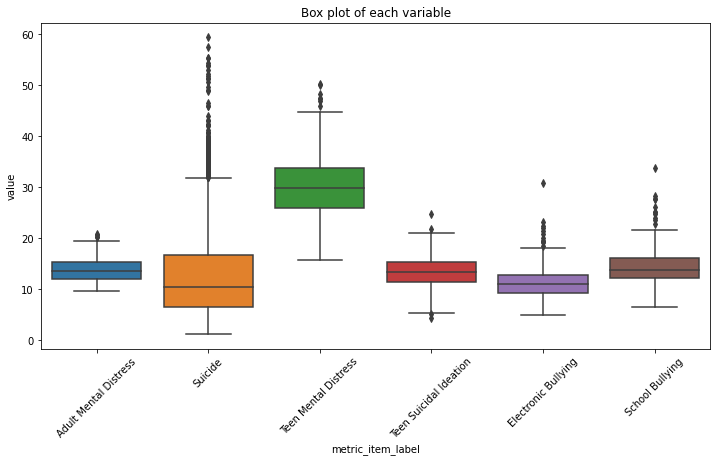

In [21]:
# Box plot to show the distribution of data for each variable
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='metric_item_label', y='value')
plt.xticks(rotation=45)
plt.title('Box plot of each variable')
plt.show()


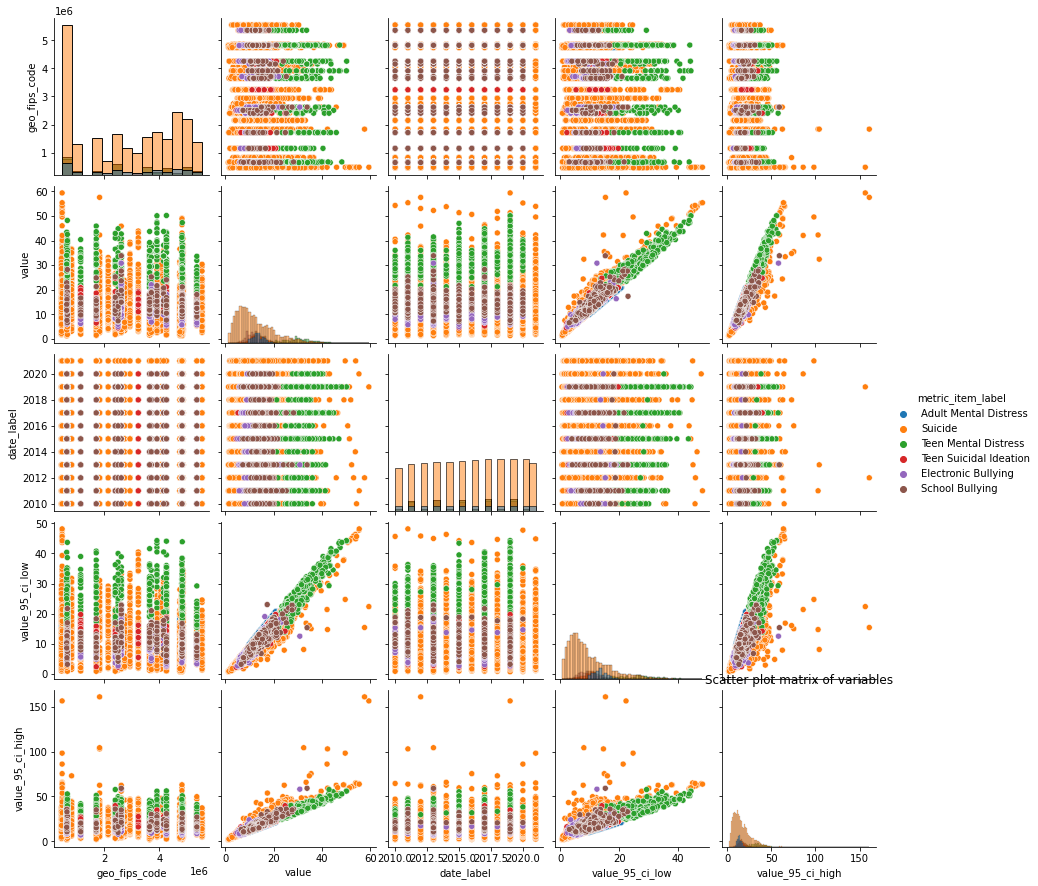

In [18]:
# Scatter plot matrix to visualize relationships between variables
sns.pairplot(filtered_data, hue='metric_item_label', diag_kind='hist')
plt.title('Scatter plot matrix of variables')
plt.show()

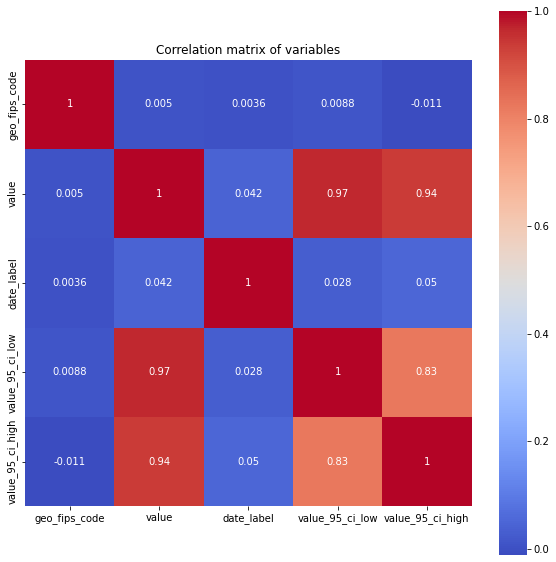

In [19]:
# Correlation matrix to show correlation coefficients between variables
corr_matrix = filtered_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation matrix of variables')
plt.show()